In [16]:
import math

# Constants
L0 = 10.0  # Length of the base link (cm)
L1 = 10.5  # Length of the first link (cm)
L2 = 15.0  # Length of the second link (cm)

def computeIK_3D(x, y, z):
    # Calculate theta0 (rotation of link L0)
    theta0_rad = math.atan2(y, x)
    
    # Length from the base to the target point in xy-plane
    d_xy = math.sqrt(x**2 + y**2)

    # Adjust z for the height of L0
    adjusted_z = z - L0

    # Distance from the adjusted origin to the target point
    d = math.sqrt(d_xy**2 + adjusted_z**2)

    # Calculate theta2 using the Law of Cosines
    cos_theta2 = (d**2 - L1**2 - L2**2) / (2 * L1 * L2)
    theta2_rad = math.acos(cos_theta2)

    # Calculate theta1 using the Law of Sines
    sin_theta2 = math.sqrt(1 - cos_theta2**2)
    a1 = L1 + L2*cos_theta2
    b1 = L2*sin_theta2
    alpha1 = math.atan2(adjusted_z, d_xy)
    alpha2 = math.atan2(b1, a1)
    theta1_rad = alpha1 - alpha2
    
    # Convert to degrees
    theta0_deg = math.degrees(theta0_rad)
    theta1_deg = math.degrees(theta1_rad)
    theta2_deg = math.degrees(theta2_rad)

    return theta0_deg, theta1_deg, theta2_deg

x_sample = 10
y_sample = 10
z_sample = 15

theta0, theta1, theta2 = computeIK_3D(x_sample, y_sample, z_sample)
print(f"Theta0 (Link L0): {theta0}°")
print(f"Theta1 (Link L1): {theta1}°")
print(f"Theta2 (Link L2): {theta2}°")


Theta0 (Link L0): 45.0°
Theta1 (Link L1): -50.041464250786646°
Theta2 (Link L2): 110.48731511472265°


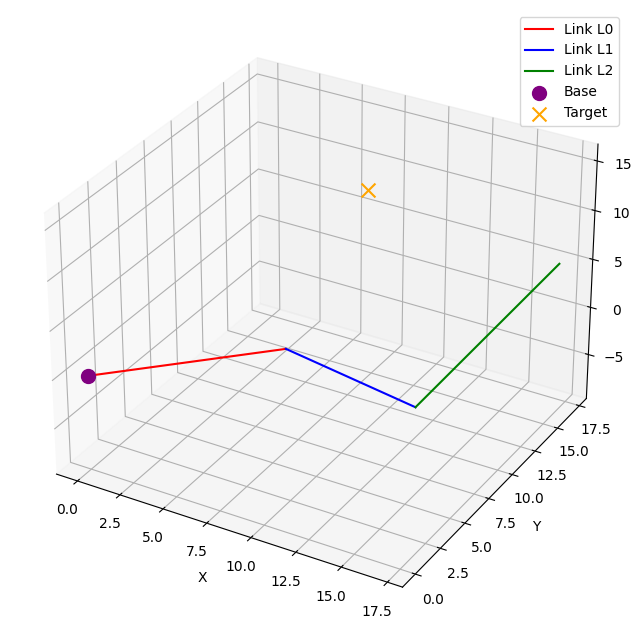

In [17]:
def plot_robot_arm_3D(x, y, z):
    theta0_deg, theta1_deg, theta2_deg = computeIK_3D(x, y, z)
    
    # Convert degrees to radians for calculations
    theta0_rad = np.radians(theta0_deg)
    theta1_rad = np.radians(theta1_deg)
    theta2_rad = np.radians(theta2_deg)

    # Link L0 position
    x0 = L0 * np.cos(theta0_rad)
    y0 = L0 * np.sin(theta0_rad)
    z0 = 0.0

    # Link L1 position
    x1 = x0 + L1 * np.cos(theta0_rad) * np.cos(theta1_rad)
    y1 = y0 + L1 * np.sin(theta0_rad) * np.cos(theta1_rad)
    z1 = z0 + L1 * np.sin(theta1_rad)

    # Link L2 position
    x2 = x1 + L2 * np.cos(theta0_rad) * np.cos(theta1_rad + theta2_rad)
    y2 = y1 + L2 * np.sin(theta0_rad) * np.cos(theta1_rad + theta2_rad)
    z2 = z1 + L2 * np.sin(theta1_rad + theta2_rad)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot links
    ax.plot([0, x0], [0, y0], [0, z0], color="red", label="Link L0")
    ax.plot([x0, x1], [y0, y1], [z0, z1], color="blue", label="Link L1")
    ax.plot([x1, x2], [y1, y2], [z1, z2], color="green", label="Link L2")

    # Plot base and target points
    ax.scatter(0, 0, 0, color="purple", s=100, label="Base")
    ax.scatter(x, y, z, color="orange", s=100, marker='x', label="Target")

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.grid(True)
    plt.show()

# Plot robot arm for a sample 3D position
x_sample = 10
y_sample = 10
z_sample = 15

plot_robot_arm_3D(x_sample, y_sample, z_sample)